# Homework4: Wasserstein GANs and GAN evaluation

## Task 1: Theory (4pt)

### Problem 1: Least Squares GAN (1pt)
    
The Vanilla GAN often suffers from problems with a vanishing gradient. [Least Squares GAN](https://arxiv.org/abs/1611.04076) tries to solve this problem by replacing the error function with the following:
$$
   	\min_D V(D) = \min_D \frac{1}{2}\left[ \mathbb{E}_{\pi(\mathbf{x})} (D(\mathbf{x}) - b)^2 + \mathbb{E}_{p(\mathbf{z})} (D(G(\mathbf{z})) - a)^2 \right]
$$
$$
   	\min_G V(G) = \min_G \frac{1}{2}\left[ \mathbb{E}_{\pi(\mathbf{x})} (D(\mathbf{x}) - c)^2 + \mathbb{E}_{p(\mathbf{z})} (D(G(\mathbf{z})) - c)^2 \right],
$$
where $a,b,c \in \mathbb{R}$ some fixed constants.

1) Write out the formula for the optimal discriminator $D^*$.
  
2) Write out the expression for the error function of the generator $V(G)$ in the case of an optimal discriminator $D^*$.
  
3) Prove that for $b - c = 1$, $b - a = 2$, the error function of the generator $V(G)$ in the case of the optimal discriminator $D^*$ takes the form:
$$
   	V(G) = \chi^2_{\text{Pearson}} \left(\frac{\pi(\mathbf{x}) + p(\mathbf{x} | \boldsymbol{\theta})}{2} || p(\mathbf{x} | \boldsymbol{\theta})\right),
$$
where $\chi^2_{\text{Pearson}} (p || q)$ is a squared Pearson divergence:
$$
   	\chi^2_{\text{Pearson}} (p || q) = \int \frac{(p(\mathbf{x}) - q(\mathbf{x}))^2}{p(\mathbf{x})} d \mathbf{x}.
$$

### Solution:

1) $$ V(D) = \frac{1}{2}\left[ \mathbb{E}_{\pi(\mathbf{x})} (D(\mathbf{x}) - b)^2 + \mathbb{E}_{p(\mathbf{z})} (D(G(\mathbf{z})) - a)^2 \right] = \frac{1}{2} \int (\pi(\mathbf{x}) (D(\mathbf{x}) - b)^2 + p(\mathbf{x} | \boldsymbol{\theta}) (D(\mathbf{x}) - a)^2 ) d\mathbf{x}   $$
Let $ y(D) $ be whole expression under integral.

$$ \frac{d y(D^*)}{d D} = 0 \Rightarrow \frac{d y(D)}{d D} = 2\pi(\mathbf{x}) (D(\mathbf{x}) - b) + 2 p(\mathbf{x} | \boldsymbol{\theta}) (D(\mathbf{x}) - a) = 0 \Rightarrow (\pi(\mathbf{x}) + p(\mathbf{x} | \boldsymbol{\theta})) D^*(\mathbf{x}) = \pi(\mathbf{x}) b + p(\mathbf{x} | \boldsymbol{\theta})a \Rightarrow D^*(\mathbf{x}) = \frac{\pi(\mathbf{x}) b + p(\mathbf{x} | \boldsymbol{\theta})a }{\pi(\mathbf{x}) + p(\mathbf{x} | \boldsymbol{\theta})}    $$

2) $$ D^*(\mathbf{x}) - c = \frac{\pi(\mathbf{x}) (b - c) + p(\mathbf{x} | \boldsymbol{\theta}) (a - c) }{\pi(\mathbf{x}) + p(\mathbf{x} | \boldsymbol{\theta})}     $$
$$ V_{D^*}(G) = \frac{1}{2}\left[ \mathbb{E}_{\pi(\mathbf{x})} \left( \frac{\pi(\mathbf{x}) (b - c) + p(\mathbf{x} | \boldsymbol{\theta}) (a - c) }{\pi(\mathbf{x}) + p(\mathbf{x} | \boldsymbol{\theta})} \right)^2 + \mathbb{E}_{p(\mathbf{x} | \boldsymbol{\theta})} \left( \frac{\pi(\mathbf{x}) (b - c) + p(\mathbf{x} | \boldsymbol{\theta}) (a - c) }{\pi(\mathbf{x}) + p(\mathbf{x} | \boldsymbol{\theta})}   \right)^2 \right]      $$

3) $$ b - c = 1, b - a = 2, a -c =-1 \Rightarrow D^*(\mathbf{x}) -c = \frac{\pi(\mathbf{x}) - p(\mathbf{x} | \boldsymbol{\theta}) }{\pi(\mathbf{x}) + p(\mathbf{x} | \boldsymbol{\theta})}    $$
We need to proof:
$$ V(G) = \chi^2_{\text{Pearson}} \left(\frac{\pi(\mathbf{x}) + p(\mathbf{x} | \boldsymbol{\theta})}{2} || p(\mathbf{x} | \boldsymbol{\theta})\right) = \int \frac{(\frac{\pi(\mathbf{x}) + p(\mathbf{x} | \boldsymbol{\theta})}{2}  - p(\mathbf{x} | \boldsymbol{\theta}))^2}{\frac{\pi(\mathbf{x}) + p(\mathbf{x} | \boldsymbol{\theta})}{2} } d \mathbf{x} = \int \frac{(\pi(\mathbf{x}) - p(\mathbf{x} | \boldsymbol{\theta}) )^2}{ 2(\pi(\mathbf{x}) + p(\mathbf{x} | \boldsymbol{\theta})) } d \mathbf{x}  $$

Our:
$$ V_{D^*}(G) = \int \left[ \frac{ \pi(\mathbf{x}) (\pi(\mathbf{x}) - p(\mathbf{x} | \boldsymbol{\theta}))^2 }{2 (\pi(\mathbf{x}) + p(\mathbf{x} | \boldsymbol{\theta}))^2 }    +     \frac{ p(\mathbf{x} | \boldsymbol{\theta}) (\pi(\mathbf{x}) - p(\mathbf{x} | \boldsymbol{\theta}))^2 }{ 2 (\pi(\mathbf{x}) + p(\mathbf{x} | \boldsymbol{\theta}))^2 } \right] d\mathbf{x} = \int \frac{(\pi(\mathbf{x}) - p(\mathbf{x} | \boldsymbol{\theta}))^2}{2 (\pi(\mathbf{x}) + p(\mathbf{x} | \boldsymbol{\theta})) } d\mathbf{x} = \chi^2_{\text{Pearson}} \left(\frac{\pi(\mathbf{x}) + p(\mathbf{x} | \boldsymbol{\theta})}{2} || p(\mathbf{x} | \boldsymbol{\theta})\right)    $$

### Problem 2: Conjugate functions / f-GAN (1pt)

We have discussed the framework for f-divergence minimization at the Lecture 8. There we have got the variational inequality for f-divergence using Fenchel conjugate function:
$$
    D_f(\pi || p) \geq \sup_{T \in \mathcal{T}} \left[\mathbb{E}_{\pi}T(\mathbf{x}) -  \mathbb{E}_p f^*(T(\mathbf{x})) \right].
$$
Here
$$
	f^*(t) = \sup_{u \in \text{dom}_f} \left( ut - f(u) \right), \quad f(u) = \sup_{t \in \text{dom}_{f^*}} \left( ut - f^*(t) \right).
$$

In this task you have to derive standard GAN objective from the variational inequality.

Let define function $f(u) = u \log u - (u + 1) \log (u + 1)$.

- Find $\text{dom}(f)$.
- Show that $f^*(t) = - \log (1 - e^t)$.
- Use reparametrization $T(\mathbf{x}) = \log D(\mathbf{x})$ to get the standard GAN objective (note that $D(\mathbf{x}) \in (0, 1)$, explain why this reparametrization is correct).


### Solution:

1) $ dom(f) = \left\{ u \in \mathbb{R}: u \geq 0  \right\}  $

2) $ f^*(t) = \sup_{u \in \text{dom}_f} \left( ut - f(u) \right) ⇒ \frac{d f^*(t)}{du} = 0 = \frac{d f^*(t)}{d u} = t - \frac{d f(u)}{du} = 0 \\ $
$$ \frac{df }{du} = \frac{d ( u \log u - (u + 1) \log (u + 1)) }{du} = \log u + u \frac{1}{u} - \log(u+1) - (u+1) \frac{1}{u+1} = \\ \log \left( \frac{u}{u+1}\right) ⇒ t - \log \left( \frac{u}{u+1}\right) = 0 ⇒ \frac{1}{e^t} = 1 + \frac{1}{u} ⇒ u_{sup} = \frac{e^t}{1 - e^t} $$
Then:
$$ f^*(t) = u_{sup}t -f(u_{sup}) = \frac{e^t * t}{1 - e^t} - \left[\frac{e^t}{1 - e^t} \left(t - \log(1 - e^t)  \right) - \left(\frac{e^t}{1 - e^t} +1 \right) \log \left(\frac{e^t}{1 - e^t} +1 \right)  \right] = \frac{e^t * t}{1 - e^t} - \left[\frac{e^t}{1 - e^t} \left(t - \log(1 - e^t)  \right) - \left(\frac{1}{1 - e^t} \right) (\log(1) - \log(1 - e^t) ) \right] = \frac{e^t * t}{1 - e^t} - \left[\frac{e^t t}{1 - e^t} - \frac{e^t \log(1 - e^t)}{1 - e^t} + \frac{\log(1 - e^t)}{1 - e^t} \right] = \frac{e^t \log(1 - e^t)}{1 - e^t} - \frac{\log(1 - e^t)}{1 - e^t} = \frac{\log (1 - e^t)}{1 - e^t} (e^t - 1) = -\log(1- e^t)  $$

3)$$  \min D_f(\pi || p) \geq \sup_{T \in \mathcal{T}} \left[\mathbb{E}_{\pi}T(\mathbf{x}) -  \mathbb{E}_p f^*(T(\mathbf{x})) \right] = \min_{G} \max_{D} \left[\mathbb{E}_{\pi} \log D(\mathbf{x}) -  \mathbb{E}_p f^*(\log D(\mathbf{x})) \right] = \min_{G} \max_{D} \left[\mathbb{E}_{\pi} \log D(\mathbf{x}) +  \mathbb{E}_p \log (1 - D(\mathbf{x})) \right]    $$
Explaining correctness: Optimal discriminator D(x) for GANs is: $ D^*(x) = \frac{\pi(x)}{\pi(x) + p(x | \theta)}$ $ \\ $
Optimal $T^*(x)$ for supremum is: $ T^*(x) = f'(\frac{\pi(x)}{p(x|\theta)}) $
$ \\ $ Let $ f(u) = u \log u - (u + 1) \log (u + 1) $,  then:
$$ T^*(x) = f'(u) = \log \left(\frac{u}{u+1} \right) ⇒ f' \left(\frac{\pi(x)}{p(x|\theta)} \right) = \log \left( \frac{\frac{\pi(x)}{p(x | \theta)}}{\frac{\pi(x)}{\pi(x) + p(x|\theta)} + 1} \right) = \log \left( \frac{\frac{\pi(x)}{p(x | \theta)} p(x|\theta)}{\pi(x) + p(x|\theta)} \right) = \log \left( \frac{\pi(x)}{\pi(x) + p(x|\theta)} \right) = \log D(x) $$


### Problem 3: Frechet Inception Distance  (2pt)
Let prove the theorem from the Lecture 8.
Remember the Wasserstein metric:
$$
    W_s(\pi, p) = \inf_{\gamma \in \Gamma(\pi, p)} \left(\mathbb{E}_{(\mathbf{x}, \mathbf{y}) \sim \gamma} \| \mathbf{x} - \mathbf{y} \|^s\right)^{1/s}
$$

Consider the case $\mathbf{x} \sim \pi(\mathbf{x}) = \mathcal{N}(\boldsymbol{\mu}_1, \sigma_1^2 \mathbf{I})$, $\mathbf{y} \sim p(\mathbf{y}) = \mathcal{N}(\boldsymbol{\mu}_2, \sigma_2^2 \mathbf{I})$.

Let prove that in this case
$$
    W_2^2(\pi, p) = \inf_{\gamma \in \Gamma(\pi, p)} \mathbb{E}_{(\mathbf{x}, \mathbf{y}) \sim \gamma} \| \mathbf{x} - \mathbf{y} \|^2 = \| \boldsymbol{\mu}_1 - \boldsymbol{\mu}_2 \|^2 + m \cdot (\sigma_1 - \sigma_2)^2.
$$
Here $m$ is a dimensionality of the space ($\mathbf{x}, \mathbf{y} \in \mathbb{R}^m$).

**Hints:** (one of the possible solutions)
1. Consider the case $\boldsymbol{\mu}_1 = \boldsymbol{\mu}_2 = 0$.
2. Use Cauchy–Schwarz inequality to prove that the value given above is a minimal.
2. Find the analytical mapping between $\mathbf{x}$ and $\mathbf{y}$ that gives this value.

### Solution:

Заметим, что вектор X-Y распределен нормально $ N(\mu_1 - \mu_2, \sigma_1 + \sigma_2) $.Так как все компоненты вектора независимо распределены (в силу диагональной ковариационной матрицы) верно: \\
$$ \mathbb{E}_{(\mathbf{x}, \mathbf{y}) \sim \gamma} \| \mathbf{x} - \mathbf{y} \|^2 = \mathbb{E}_{(\mathbf{x}, \mathbf{y}) \sim \gamma} \sum_i (x-y)_i^2 =
 \sum_i ( \mathbb{E}_{(\mathbf{x}, \mathbf{y}) \sim \gamma} [(x-y)_i] )^2 + \mathbb{D}[(x-y)_i] = \sum_i \left[ (\mu_1 - \mu_2)^2   \right] + = \| \mu_1 - \mu_2 \| ^ 2 $$
 Неравенство КБШ обращается в равенство, когда X и Y линейно зависимы, то есть существует такая матрица A:
$ Y = \mu_2 + \frac{1}{\sigma_1} (\sigma_1 \sigma_2 ^ 2 \sigma_1)^{\frac{1}{2}} \frac{1}{\sigma_1} (X - \mu_1)   $, где $ A = \frac{1}{\sigma_1} (\sigma_1 \sigma_2 ^ 2 \sigma_1)^{\frac{1}{2}} \frac{1}{\sigma_1} $.
При этом A равенство будет достигнуто. $ \mathbb{E} [X - Y] = \mu_x - \mu_y$, $ \mathbb{D} [X - Y] = (\sigma_1 - \sigma_2)^2 I $  \\
$ X - Y = X - \mu_2 - A (X - \mu_1)   $


In [ ]:
!pip install --upgrade --no-cache-dir gdown

REPO_NAME = "2024-DGM-AIMasters-course"
!if [ -d {REPO_NAME} ]; then rm -Rf {REPO_NAME}; fi
!git clone https://github.com/r-isachenko/{REPO_NAME}.git
!cd {REPO_NAME}
!pip install ./{REPO_NAME}/homeworks/
!mv ./{REPO_NAME}/homeworks/stylegan.py ./stylegan.py
!mv ./{REPO_NAME}/homeworks/inception.py ./inception.py
!rm -Rf {REPO_NAME}

Cloning into '2024-DGM-AIMasters-course'...
remote: Enumerating objects: 1024, done.
remote: Counting objects: 100% (197/197), done.
remote: Compressing objects: 100% (118/118), done.
remote: Total 1024 (delta 86), reused 183 (delta 78), pack-reused 827
Receiving objects: 100% (1024/1024), 357.18 MiB | 37.44 MiB/s, done.
Resolving deltas: 100% (404/404), done.
Updating files: 100% (357/357), done.
Processing ./2024-DGM-AIMasters-course/homeworks
  Preparing metadata (setup.py) ... done
  Created wheel for dgm-utils: filename=dgm_utils-0.1.0-py3-none-any.whl size=4123 sha256=02c4cd81211fac72c19f5371d1a8facc69935ad7db1576f082842f21761b1017
  Stored in directory: /tmp/pip-ephem-wheel-cache-b5nhtpyg/wheels/70/2d/4a/feb107c3ab3dd281ab79607ad031d9052bc90dc1b6e999be10
Successfully built dgm-utils
  Attempting uninstall: dgm-utils
    Found existing installation: dgm-utils 0.1.0
    Uninstalling dgm-utils-0.1.0:
      Successfully uninstalled dgm-utils-0.1.0


In [ ]:
from dgm_utils import train_model, show_samples, plot_training_curves
from dgm_utils import visualize_images, load_dataset

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from functools import partial
from tqdm.notebook import tqdm
from typing import Optional
from IPython.display import clear_output

import scipy
from scipy.stats import entropy

import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
from torch.nn import functional as F
from torch.distributions import Normal
from inception import InceptionV3

torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.enabled = False


def reset_seed():
    OUTPUT_SEED = 0xBADBEEF
    torch.manual_seed(OUTPUT_SEED)
    np.random.seed(OUTPUT_SEED)


USE_CUDA = torch.cuda.is_available()

print("cuda is available:", USE_CUDA)

cuda is available: True


In [ ]:
from dgm_utils import show_samples, plot_training_curves
from dgm_utils import visualize_images, load_dataset

In [ ]:
# do not change this function
def plot_losses(losses: np.ndarray, title: str):
    n_itr = len(losses)
    xs = np.arange(n_itr)

    plt.figure(figsize=(7, 5))
    plt.plot(xs, losses)
    plt.title(title, fontsize=14)
    plt.xlabel("Iterations", fontsize=14)
    plt.ylabel("Loss", fontsize=14)

    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

## Task 2: Wasserstein GANs for CIFAR 10 (5pt)

In this task you will fit different kinds of Wasserstein GANs (different ways to enforce Lipschitzness) that we discussed at the Lecture 8 to the CIFAR10 dataset
* [WGAN](https://arxiv.org/abs/1701.07875) - standard Wasserstein GAN with weight clipping;
* [WGAN-GP](https://arxiv.org/pdf/1704.00028.pdf) - Wasserstein GAN with Gradient Penalty.

Files already downloaded and verified
Files already downloaded and verified


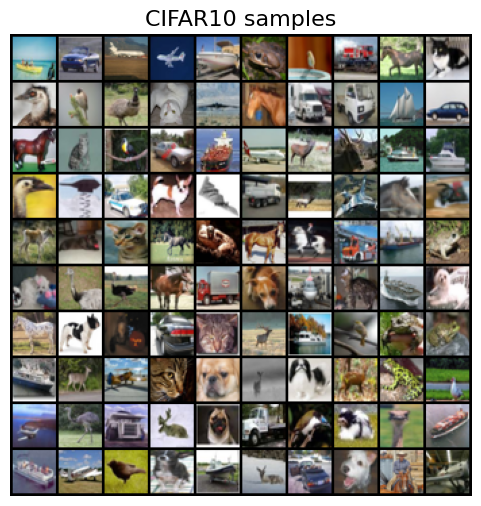

In [ ]:
train_data, test_data = load_dataset("cifar10", flatten=False, binarize=False)
visualize_images(train_data, "CIFAR10 samples")

### Problem 1: WGAN (3pt)

[WGAN](https://arxiv.org/abs/1701.07875) model uses weight clipping to enforce Lipschitzness of the critic.

The model objective is
$$
\min_{G} W(\pi || p) \approx \min_{G} \max_{\boldsymbol{\phi} \in \boldsymbol{\Phi}} \left[ \mathbb{E}_{\pi(\mathbf{x})} f_{\boldsymbol{\phi}}(\mathbf{x})  - \mathbb{E}_{p(\mathbf{z})} f_{\boldsymbol{\phi}}(G_{\boldsymbol{\theta}}(\mathbf{z}))\right].
$$
Here $f_{\boldsymbol{\phi}}(\mathbf{x})$ is the critic model. The critic weights $\boldsymbol{\phi}$ should lie in the compact set $\boldsymbol{\Phi} = [-c, c]^d$.

In this task we will use convolutional networks for the generator $G_{\boldsymbol{\theta}}(\mathbf{z})$ and the critic $f_{\boldsymbol{\phi}}(\mathbf{x})$.

First of all, let define generator network. It will be the same for all WGAN models.

In [ ]:
class ConvGenerator(nn.Module):
    def __init__(self, input_size: int = 128, n_channels: int = 64) -> None:
        super().__init__()
        self.n_channels = n_channels
        self.input_size = input_size
        # ====
        # your code
        # ====

        # self.net = nn.Sequential(
        #     nn.ConvTranspose2d(in_channels=self.input_size, out_channels=1024, kernel_size=4, stride=1, padding=0),
        #     nn.BatchNorm2d(num_features=1024),
        #     nn.ReLU(True),

        #     # State (1024x4x4)
        #     nn.ConvTranspose2d(in_channels=1024, out_channels=512, kernel_size=4, stride=2, padding=1),
        #     nn.BatchNorm2d(num_features=512),
        #     nn.ReLU(True),

        #     # State (512x8x8)
        #     nn.ConvTranspose2d(in_channels=512, out_channels=256, kernel_size=4, stride=2, padding=1),
        #     nn.BatchNorm2d(num_features=256),
        #     nn.ReLU(True),

        #     # State (256x16x16)
        #     nn.ConvTranspose2d(in_channels=256, out_channels=3, kernel_size=4, stride=2, padding=1),
        #     # output of main module --> Image (Cx32x32)
        #     nn.Tanh()
        # )

        ngf = self.n_channels
        self.net = nn.Sequential(
            nn.ConvTranspose2d(self.input_size, ngf * 8, 4, 1, 0, bias=False),
            nn.BatchNorm2d(ngf * 8),
            nn.ReLU(True),
            #nn.Dropout2d(0.2),
            # state size. (ngf*8) x 4 x 4

            nn.ConvTranspose2d(ngf * 8, ngf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 4),
            nn.ReLU(True),
            #nn.Dropout2d(0.2),
            # state size. (ngf*4) x 8 x 8

            nn.ConvTranspose2d(ngf * 4, ngf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 2),
            nn.ReLU(True),
            #nn.Dropout2d(0.3),
            # state size. (ngf*2) x 16 x 16

            # nn.ConvTranspose2d(ngf * 2, ngf, 4, 2, 1, bias=False),
            # nn.BatchNorm2d(ngf),
            # nn.ReLU(True),
            # # state size. (ngf) x 32 x 32

            nn.ConvTranspose2d(ngf * 2, 3, 4, 2, 1, bias=False),
            nn.Tanh()
            # state size. ``(nc) x 64 x 64``
        )


    @property
    def device(self):
        return next(self.parameters()).device

    def forward(self, input: torch.Tensor) -> torch.Tensor:
        # ====
        # your code
        # apply all layers

        if input.shape != (input.shape[0], input.shape[1], 1, 1):
            input = input[:, : , None, None]

        output = self.net(input)
        return output.view(-1, 3, 32, 32)

    def sample(self, n_samples: int) -> torch.Tensor:
        # ====
        # your code
        # sample from standard normal distribution and apply the model

        input = torch.randn((n_samples, self.input_size, 1, 1), device=self.device)
        samples = self.forward(input)

        return samples


def test_conv_generator():
    model = ConvGenerator(input_size=4, n_channels=32)
    x = torch.randn((2, 4))
    out = model(x)
    assert list(out.size()) == [2, 3, 32, 32], out.size()

    out = model.sample(10)
    assert list(out.size()) == [10, 3, 32, 32], out.size()


test_conv_generator()

In [ ]:
model = ConvGenerator(n_channels=64)
model

ConvGenerator(
  (net): Sequential(
    (0): ConvTranspose2d(128, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): ConvTranspose2d(128, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (10): Tanh()
  )
)

Now it is time to define our critic. Here we will use the same class for all WGAN models, but the arguments will depend on the WGAN mode.

In [ ]:
class ConvCritic(nn.Module):
    def __init__(
        self, n_channels: int, clip_c: Optional[float] = None,
    ) -> None:
        super().__init__()
        self.n_channels = n_channels
        self.clip_c = clip_c
        # ====
        # your code
        # ====

        # self.net = nn.Sequential(
        #     # Image (Cx32x32)
        #     nn.Conv2d(in_channels=channels, out_channels=256, kernel_size=4, stride=2, padding=1),
        #     nn.BatchNorm2d(num_features=256),
        #     nn.LeakyReLU(0.2, inplace=True),

        #     # State (256x16x16)
        #     nn.Conv2d(in_channels=256, out_channels=512, kernel_size=4, stride=2, padding=1),
        #     nn.BatchNorm2d(num_features=512),
        #     nn.LeakyReLU(0.2, inplace=True),

        #     # State (512x8x8)
        #     nn.Conv2d(in_channels=512, out_channels=1024, kernel_size=4, stride=2, padding=1),
        #     nn.BatchNorm2d(num_features=1024),
        #     nn.LeakyReLU(0.2, inplace=True),
        #     # State (1024x4x4)

        #     nn.Conv2d(in_channels=1024, out_channels=1, kernel_size=4, stride=1, padding=0)
        # )

        ndf = self.n_channels
        self.net = nn.Sequential(
            # input is ``(nc) x 64 x 64``
            nn.Conv2d(3, ndf * 2, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. ``(ndf) x 32 x 32``

            # nn.Conv2d(ndf, ndf * 2, 4, 2, 1, bias=False),
            # nn.BatchNorm2d(ndf * 2),
            # nn.LeakyReLU(0.2, inplace=True),
            # state size. ``(ndf*2) x 16 x 16``

            nn.Conv2d(ndf * 2, ndf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 4),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. ``(ndf*4) x 8 x 8``

            nn.Conv2d(ndf * 4, ndf * 8, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 8),
            nn.LeakyReLU(0.2, inplace=True),
            # #state size. ``(ndf*8) x 4 x 4``

            nn.Conv2d(ndf * 8, 1, 4, 1, 0, bias=False),
        )


    def clip_weights(self) -> None:
        # for layer in self.net.layer1:
        #     if isinstance(layer, nn.Linear) or isinstance(layer, nn.Conv2d):
        #         # ====
        #         # your code
        #         # clip the weight to the range [-clip_c, clip_c]

        #         # ====
        #         weight = layer.weight.data
        #         weight = torch.clamp(weight, -self.clip_c, self.clip_c)
        #         layer.weight.data = weight

        for name, layer in self.net.named_modules():
            if isinstance(layer, torch.nn.Conv2d) or isinstance(layer, nn.Linear):
                weight = layer.weight.data
                weight = torch.clamp(weight, -1 * self.clip_c, self.clip_c)
                layer.weight.data = weight

        # for p in self.parameters():
        #             p.data.clamp_(-1 * self.clip_c, self.clip_c)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        # ====
        # your code
        # 1) clip the critic weights (if clip_c is given)
        # 2) apply all layers

        # ====
        if self.clip_c is not None:
            self.clip_weights()

        return torch.squeeze(self.net(x), dim=(2, 3))


def test_conv_critic():
    model = ConvCritic(n_channels=32, clip_c=0.01)
    x = torch.randn((2, 3, 32, 32))
    out = model(x)
    assert list(out.size()) == [2, 1], out.size()


test_conv_critic()

In [ ]:
model = ConvCritic(n_channels=64, clip_c=0.01)
model

ConvCritic(
  (net): Sequential(
    (0): Conv2d(3, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
    (2): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): LeakyReLU(negative_slope=0.2, inplace=True)
    (5): Conv2d(256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (6): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): LeakyReLU(negative_slope=0.2, inplace=True)
    (8): Conv2d(512, 1, kernel_size=(4, 4), stride=(1, 1), bias=False)
  )
)

In [ ]:
def train_wgan(
    generator: nn.Module,
    critic: nn.Module,
    train_loader: object,
    critic_steps: int,
    batch_size: int,
    n_epochs: int,
    lr: float,
    use_cuda: bool = False,
    gp_weight: Optional[float] = None,
) -> dict:

    if use_cuda:
        critic = critic.cuda()
        generator = generator.cuda()
    critic.train()
    generator.train()

    gen_optimizer = torch.optim.Adam(generator.parameters(), lr=lr, betas=(0, 0.9))
    critic_optimizer = torch.optim.Adam(critic.parameters(), lr=lr, betas=(0, 0.9))

    curr_iter = 0
    d_loss, g_loss = torch.zeros(1), torch.zeros(1)
    batch_loss_history = {"discriminator_losses": [], "generator_losses": []}
    for epoch_i in tqdm(range(n_epochs)):
        critic.train()
        generator.train()
        for batch_i, x in enumerate(tqdm(train_loader)):
            curr_iter += 1
            if use_cuda:
                x = x.cuda()

            # do a critic update
            critic_optimizer.zero_grad()
            fake_data = generator.sample(x.shape[0])

            # ====
            # your code
            # D(x_fake) - D(x_real)

            # ====

            d_loss = critic(fake_data).mean(0) - critic(x).mean(0)

            if gp_weight is not None:
                gp = gradient_penalty(critic, x, fake_data)
                d_loss += gp_weight * gp

            d_loss.backward()
            critic_optimizer.step()

            # generator update
            if curr_iter % critic_steps == 0:
                gen_optimizer.zero_grad()
                fake_data = generator.sample(batch_size)
                # ====
                # your code
                # -D(x_fake)

                # ====
                g_loss = -critic(fake_data).mean(0)

                g_loss.backward()
                gen_optimizer.step()

                batch_loss_history["generator_losses"].append(-g_loss.data.cpu().numpy())
                batch_loss_history["discriminator_losses"].append(
                    d_loss.data.cpu().numpy()
                )

        clear_output(wait=True)
        generator.eval()
        critic.eval()
        with torch.no_grad():
            samples = generator.sample(100)
            samples = samples.cpu().detach().numpy()

        show_samples(samples, title=f"Generated samples: epoch: {epoch_i}")
        plot_losses(batch_loss_history["discriminator_losses"], "Discriminator loss")
        plot_losses(batch_loss_history["generator_losses"], "Generator loss")

    return batch_loss_history

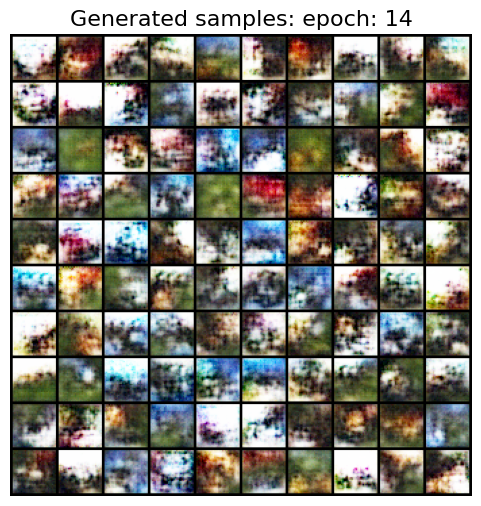

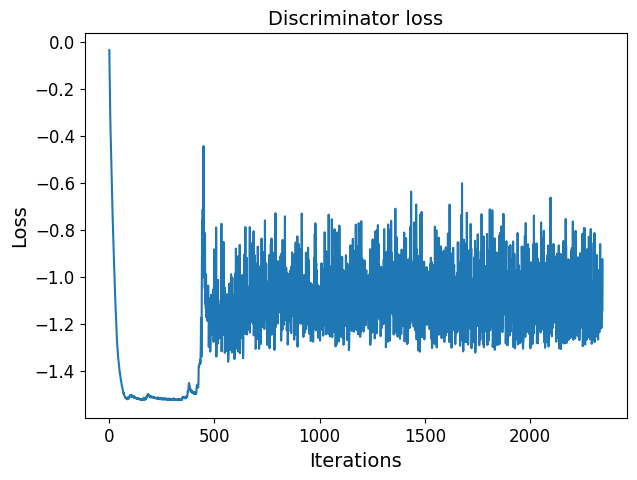

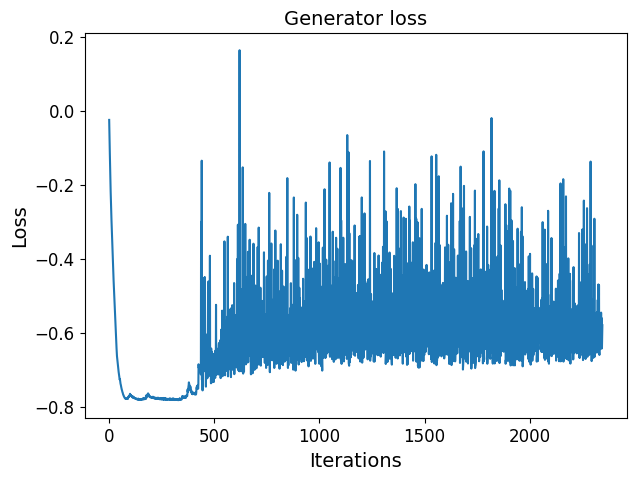

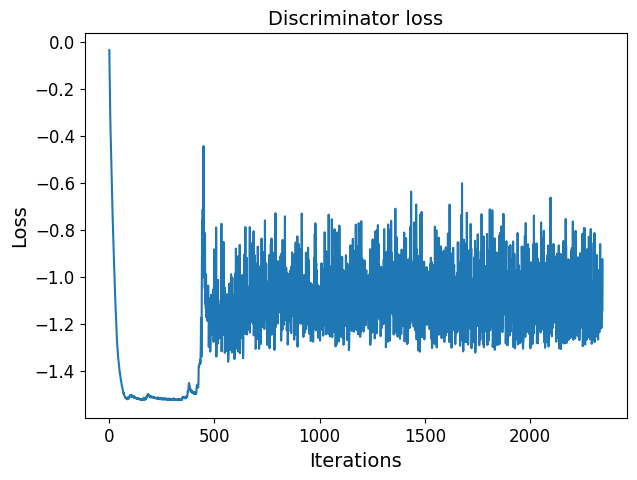

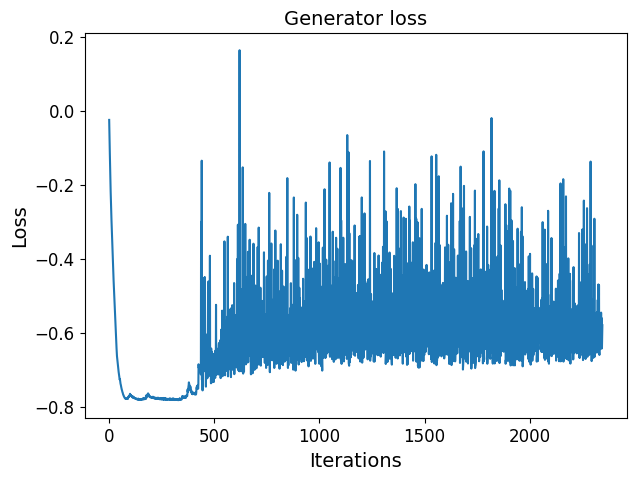

In [ ]:
# ====
# your code
# choose these parameters
BATCH_SIZE = 64  # any adequate value
N_CHANNELS = 64  # > 32
N_EPOCHS = 15 # > 10
CRITIC_STEPS = 5  # > 2
CLIP_C = 0.01  # < 1
LR = 5e-5  # < 1e-3
# ====

train_loader = data.DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)

generator = ConvGenerator(n_channels=N_CHANNELS)
critic = ConvCritic(n_channels=N_CHANNELS, clip_c=CLIP_C)

train_losses = train_wgan(
    generator,
    critic,
    train_loader,
    critic_steps=CRITIC_STEPS,
    batch_size=BATCH_SIZE,
    n_epochs=N_EPOCHS,
    lr=LR,
    use_cuda=USE_CUDA,
)

plot_losses(train_losses["discriminator_losses"], "Discriminator loss")
plot_losses(train_losses["generator_losses"], "Generator loss")

Let sample from our model and draw the samples.

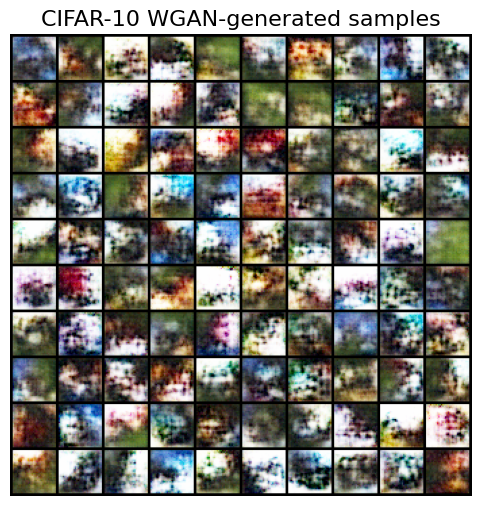

In [ ]:
generator.eval()
critic.eval()
with torch.no_grad():
    samples = generator.sample(100)
    samples = samples.cpu().detach().numpy()


show_samples(samples, title="CIFAR-10 WGAN-generated samples")

### Problem 2: WGAN-GP for CIFAR 10 (2pt)

[WGAN-GP](https://arxiv.org/pdf/1704.00028.pdf)  model uses gradient penalty to enforce Lipschitzness.

The model objective is
$$
    W(\pi || p) = \underbrace{\mathbb{E}_{\pi(\mathbf{x})} f(\mathbf{x})  - \mathbb{E}_{p(\mathbf{x} | \boldsymbol{\theta})} f(\mathbf{x})}_{\text{original critic loss}} + \lambda \underbrace{\mathbb{E}_{U[0, 1]} \left[ \left( \| \nabla_{\hat{\mathbf{x}}} f(\hat{\mathbf{x}}) \|_2 - 1 \right) ^ 2\right]}_{\text{gradient penalty}},
$$
where the samples $\hat{\mathbf{x}}_t = t \mathbf{x} + (1 - t) \mathbf{y}$ with $t \in [0, 1]$ are uniformly sampled along straight lines between pairs of points: $\mathbf{x}$ from the data distribution $\pi(\mathbf{x})$ and $\mathbf{y}$ from the generator distribution $p(\mathbf{x} | \boldsymbol{\theta}))$.

Let define our gradient penalty loss.

In [ ]:
def gradient_penalty(
    critic: object, real_data: torch.Tensor, fake_data: torch.Tensor
) -> torch.Tensor:
    batch_size = real_data.shape[0]

    # ====
    # your code
    # Calculate interpolation x_t = t * x_real + (1 - t) x_fake
    # 1) sample t
    # 2) create x_t (be careful about shapes)
    # 3) apply critic to x_t

    t = torch.rand(1, device=real_data.device, requires_grad=True)
    x_t = t * real_data + (1 - t) * fake_data
    d_output = critic(x_t)
    # ====
    gradients = torch.autograd.grad(
        outputs=d_output,
        inputs=x_t,
        grad_outputs=torch.ones(d_output.size()).to(fake_data.device),
        create_graph=True,
        retain_graph=True,
    )[0]

    gradients = gradients.reshape(batch_size, -1)
    # ====
    # your code
    # compute gradient norm
    gradients_norm = torch.norm(gradients, 2, dim=1)
    # ====
    return ((gradients_norm - 1) ** 2).mean()


def test_gradient_penalty():
    x = np.random.normal(size=(10, 4))
    x_norm = np.mean(np.sqrt(x**2))
    x = torch.randn(size=(10, 4))
    x.requires_grad = True
    assert gradient_penalty(lambda x: x, x, x).numpy() == 1
    assert gradient_penalty(lambda x: x * 0, x, x).numpy() == 1


test_gradient_penalty()

That is all :)

We will use the same `ConvGenerator`, `ConvCritic` and `train_wgan()` as for WGAN model here.

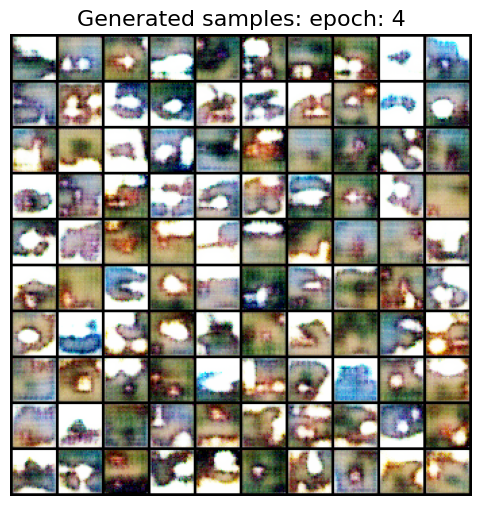

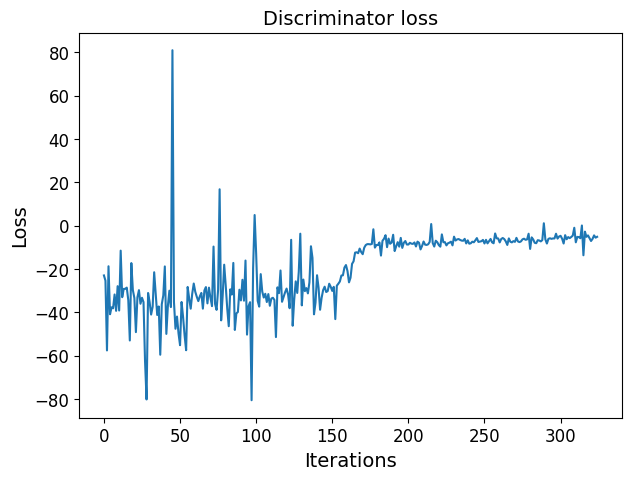

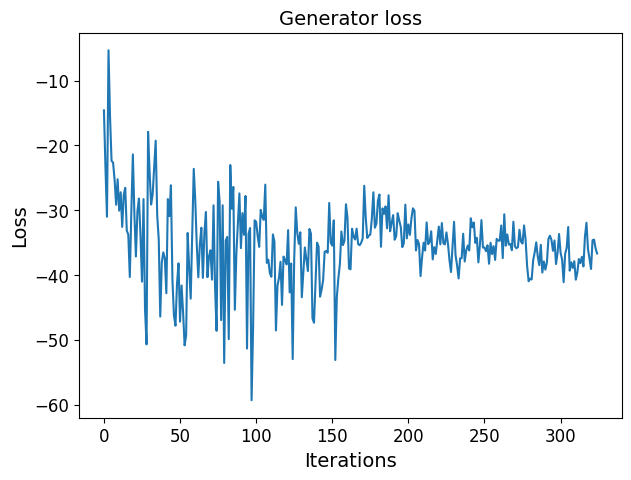

  0%|          | 0/391 [00:00<?, ?it/s]

In [ ]:
# ====
# your code
# choose these parameters
BATCH_SIZE = 128  # any adequate value
N_CHANNELS = 128  # > 32
N_EPOCHS = 20  # > 10
CRITIC_STEPS = 6  # > 2
GP_WEIGHT = 10  # > 5
LR = 1e-4  # < 1e-3
# ====

train_loader = data.DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)

generator = ConvGenerator(n_channels=N_CHANNELS)
critic = ConvCritic(n_channels=N_CHANNELS)

train_losses = train_wgan(
    generator,
    critic,
    train_loader,
    critic_steps=CRITIC_STEPS,
    batch_size=BATCH_SIZE,
    n_epochs=N_EPOCHS,
    lr=LR,
    gp_weight=GP_WEIGHT,
    use_cuda=USE_CUDA,
)

plot_losses(train_losses["discriminator_losses"], "Discriminator loss")
plot_losses(train_losses["generator_losses"], "Generator loss")

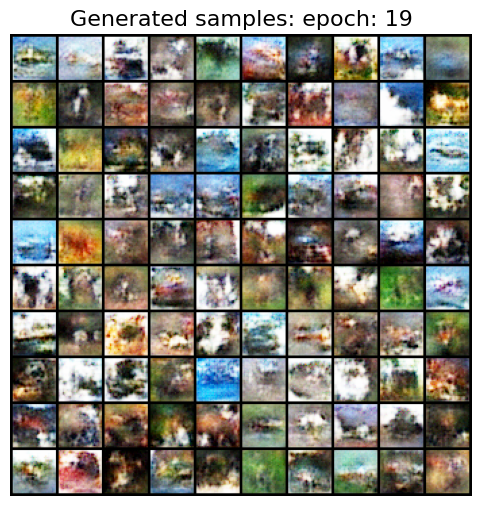

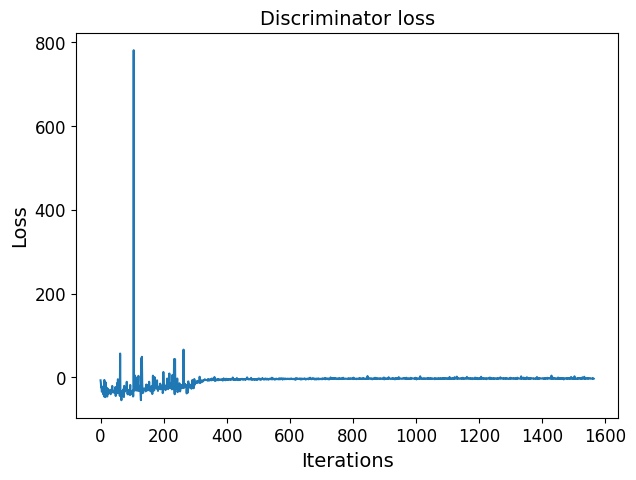

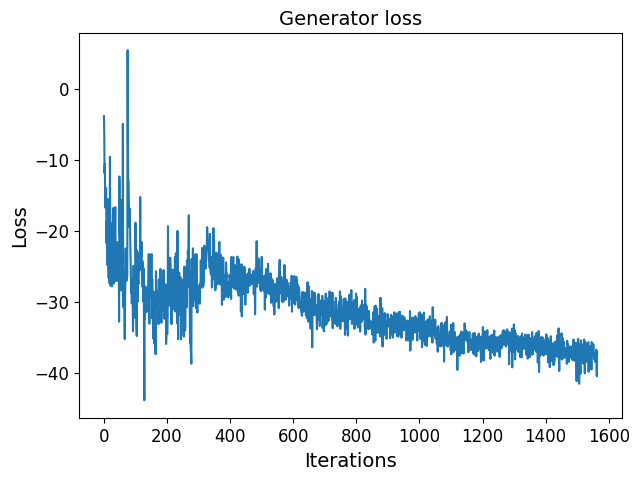

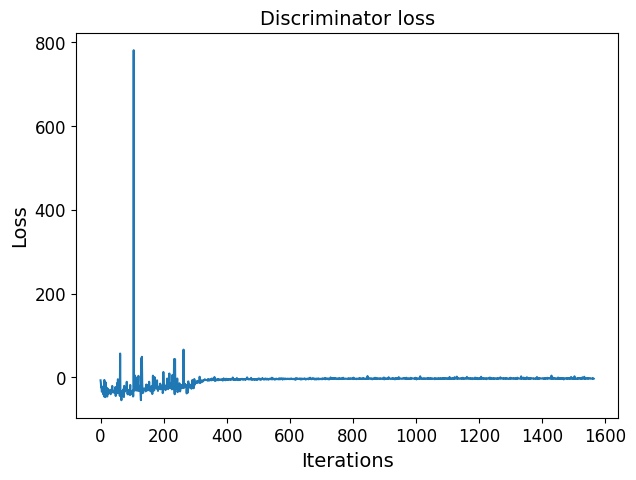

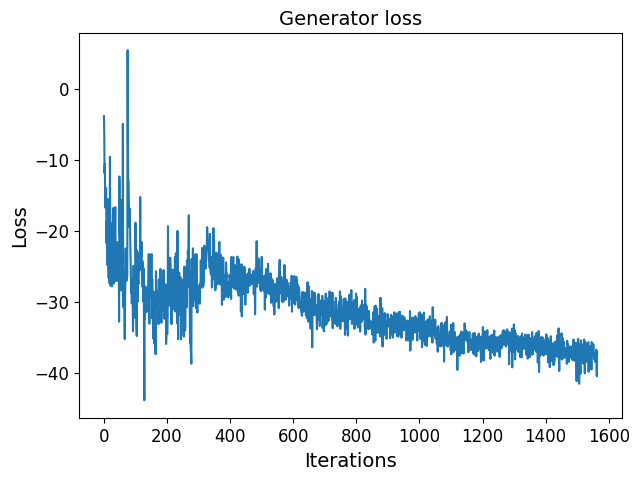

In [ ]:
# ====
# your code
# choose these parameters
BATCH_SIZE = 128  # any adequate value
N_CHANNELS = 64  # > 32
N_EPOCHS = 20  # > 10
CRITIC_STEPS = 5  # > 2
GP_WEIGHT = 10  # > 5
LR = 1e-4  # < 1e-3
# ====

train_loader = data.DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)

generator = ConvGenerator(n_channels=N_CHANNELS)
critic = ConvCritic(n_channels=N_CHANNELS)

train_losses = train_wgan(
    generator,
    critic,
    train_loader,
    critic_steps=CRITIC_STEPS,
    batch_size=BATCH_SIZE,
    n_epochs=N_EPOCHS,
    lr=LR,
    gp_weight=GP_WEIGHT,
    use_cuda=USE_CUDA,
)

plot_losses(train_losses["discriminator_losses"], "Discriminator loss")
plot_losses(train_losses["generator_losses"], "Generator loss")

Let sample from our model and draw the samples.

Семплы смотреть сверху в обучении, модель потерялась :)

In [ ]:
# generator.eval()
# critic.eval()
# with torch.no_grad():
#     samples = generator.sample(100)
#     samples = samples.cpu().detach().numpy()


# show_samples(samples, title="CIFAR-10 WGAN-GP-generated samples")

## Task 3: Inception Score and FID (4pt)

Here our goal is to understand how to evaluate likelihood-free models using [Inception Score](https://arxiv.org/pdf/1606.03498.pdf) and [Frechet Inception Distance](https://arxiv.org/pdf/1706.08500.pdf).

In [ ]:
# this is a helper function that we will use further
def resize_tensor(x: torch.Tensor, image_size: int) -> torch.Tensor:
    return F.interpolate(
        x, size=(image_size, image_size), mode="bilinear", align_corners=False
    )

In [ ]:
resize_tensor(torch.randn((10, 3, 32, 32)), 64).shape

torch.Size([10, 3, 64, 64])

Your task is to implement the *Inception score* and *FID* score and estimate the quality of two trained *StyleGAN* models we have discussed on Seminar 9 and Seminar 10:

1. `stylegan_wgangp` is a *StyleGAN* model trained with *WGAN-GP* loss on CIFAR10 dataset ([ckpt_link](https://drive.google.com/file/d/1bTDbmleLXowuGcahsoSBeihSVbGgW52X/view?usp=sharing))

2. `stylegan_r1` is a *StyleGAN* model trained with standard gan loss with $R_1$ regularization on CIFAR10 dataset ([ckpt_link](https://drive.google.com/file/d/1PNeESbetxazQkBJbBnoizyWgGKJwfpW5/view?usp=sharing))

In [ ]:
# loading models checkpoints
!gdown --id 1bTDbmleLXowuGcahsoSBeihSVbGgW52X
!gdown --id 1PNeESbetxazQkBJbBnoizyWgGKJwfpW5

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1bTDbmleLXowuGcahsoSBeihSVbGgW52X
To: /content/stylegan_wgangp_loss_FINAL.pth
100% 1.36M/1.36M [00:00<00:00, 14.4MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1PNeESbetxazQkBJbBnoizyWgGKJwfpW5
To: /content/stylegan_gan_r1_loss_FINAL.pth
100% 1.36M/1.36M [00:00<00:00, 13.2MB/s]


In [ ]:
from stylegan import MicroStyleGANGenerator
from copy import deepcopy

sg_wgangp_name = "stylegan_wgangp_loss_FINAL.pth"
sg_gan_r1_name = "stylegan_gan_r1_loss_FINAL.pth"


stylegan_wgangp = MicroStyleGANGenerator(
    z_dim=128,
    map_hidden_dim=256,
    w_dim=64,
    in_chan=64,
    out_chan=3,
    kernel_size=3,
    hidden_chan=32,
)

stylegan_r1 = deepcopy(stylegan_wgangp)

stylegan_wgangp.load_state_dict(
    torch.load("./{}".format(sg_wgangp_name), map_location="cpu")["generator"]
)

stylegan_r1.load_state_dict(
    torch.load("./{}".format(sg_gan_r1_name), map_location="cpu")["generator"]
)

<All keys matched successfully>

Let's look at model samples from `stylegan_r1`.

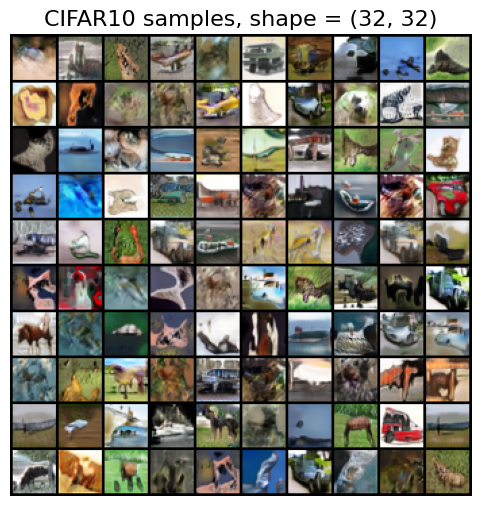

In [ ]:
batch = stylegan_r1.sample(100).detach().cpu().numpy()
show_samples(batch, "CIFAR10 samples, shape = ({0}, {0})".format(32), nrow=10)

Let's look at model samples from `stylegan_wgangp`.

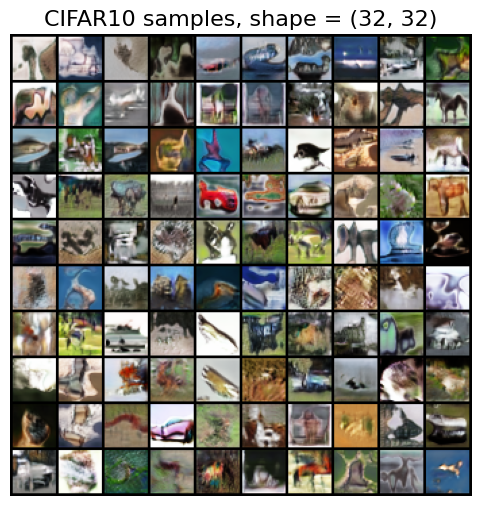

In [ ]:
batch = stylegan_wgangp.sample(100).detach().cpu().numpy()
show_samples(batch, "CIFAR10 samples, shape = ({0}, {0})".format(32), nrow=10)

### Problem 1: Inception Score (2pt)

The formula for Inception Score is
$$
    \text{IS} = \exp \bigl( \mathbb{E}_{\mathbf{x}} KL(p(y | \mathbf{x}) || p(y)) \bigr),
$$

where
* $p(y | \mathbf{x})$ is a pretrained classification model with labels $y$ (we will use [Inception V3 model](https://pytorch.org/vision/main/models/generated/torchvision.models.inception_v3.html));
* $p(y) = \int p(y | \mathbf{x}) p(\mathbf{x}) d \mathbf{x}$ is a marginal distribution on labels.

In order to calculate the **Inception** score we will use `InceptionV3` last layer activations (those before computing `Softmax`). The dimensionality of these activations is $1008$.

Let initialize our classification model.

In [ ]:
DIMS = 1008
block_idx = InceptionV3.BLOCK_INDEX_BY_DIM[DIMS]
inception_model_act5 = InceptionV3([block_idx])
if USE_CUDA:
    inception_model_act5 = inception_model_act5.cuda()
inception_model_act5.eval()

Downloading: "https://github.com/w86763777/pytorch-gan-metrics/releases/download/v0.1.0/pt_inception-2015-12-05-6726825d.pth" to /root/.cache/torch/hub/checkpoints/pt_inception-2015-12-05-6726825d.pth
100%|██████████| 91.2M/91.2M [00:00<00:00, 198MB/s]


InceptionV3(
  (blocks): ModuleList(
    (0): Sequential(
      (0): BasicConv2d(
        (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicConv2d(
        (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
      )
      (2): BasicConv2d(
        (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
      )
      (3): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (1): Sequential(
      (0): BasicConv2d(
        (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
      

We need to get class probabilities from our classification model.

In [ ]:
def get_inception_probs(x: torch.Tensor, model: object) -> np.ndarray:
    # ====
    # your code
    # apply model and get probs (apply softmax)

    # ====
    probs = nn.functional.softmax(model(x), dim=1)
    return probs.data.cpu().numpy()


def test_get_inception_probs():
    x = torch.zeros(size=(1, 3, 10, 10))
    if USE_CUDA:
        x = x.cuda()
    probs = get_inception_probs(x, inception_model_act5)
    true_probs = np.array(
        [
            0.00012616384,
            0.00031305864,
            0.00019984621,
            0.00024997862,
            0.00005619833,
            0.00010180601,
            0.00002303111,
            0.0001946776,
            0.0015921608,
            0.000064336535,
        ]
    )
    assert np.allclose(probs[0, :10], true_probs)


test_get_inception_probs()

In [ ]:
torch.cuda.empty_cache()

In [ ]:
!nvidia-smi

Wed Apr 17 18:11:07 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P0              27W /  70W |    355MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
# this is a helper function that generates samples from the StyleGAN generator
def generate_fake_images_stylegan(
    sg_generator: object, n_samples: int, batch_size: int
) -> np.ndarray:
    fake_images = []
    for i in range(n_samples // batch_size):
        fake_samples = sg_generator.sample(batch_size).cpu().detach().numpy()
        fake_images.extend(fake_samples)

    fake_samples = sg_generator.sample(n_samples % batch_size).cpu().detach().numpy()
    fake_images.extend(fake_samples)
    return np.array(fake_images)

It is the main function for getting Inception Score.

In [ ]:
def get_inception_score(
    generator: object,
    inception_model: object,
    n_samples: int,
    batch_size: int = 32,
    splits: int = 10,
) -> np.ndarray:
    if USE_CUDA:
        generator = generator.cuda()
        inception_model = inception_model.cuda()

    generator.eval()
    inception_model.eval()

    fake_images = generate_fake_images_stylegan(generator, n_samples, batch_size)
    loader = torch.utils.data.DataLoader(fake_images, batch_size=batch_size)

    # ====
    # your code
    # get probs of size [n_samples x 1008] for the fake_samples

    # ====

    probs_list = []

    for i, batch in enumerate(loader):
        pred = get_inception_probs(torch.tensor(batch, device='cuda'), inception_model)
        probs_list.append(pred)

    probs = np.concatenate(probs_list, 0)

    split_scores = []

    for k in range(splits):
        part = probs[k * (n_samples // splits) : (k + 1) * (n_samples // splits), :]
        # ====
        # your code
        # 1) calculate p_y mean value of the current part
        # 2) calculate KL (use could you entropy function from scipy)
        # 3) exponentiate it

        # ====

        p_y = part.mean(0)[None, :]
        kl = part * (np.log(part + 1e-5) - np.log(p_y + 1e-5))
        kl = np.mean(np.sum(kl, 1))
        split_scores.append(np.exp(kl))

    return np.mean(split_scores)

In [ ]:
N_SAMPLES = 1000
BATCH_SIZE = 16
SPLITS = 5

reset_seed()

IS_stylegan_r1 = get_inception_score(
    generator=stylegan_r1,
    inception_model=inception_model_act5,
    n_samples=N_SAMPLES,
    batch_size=BATCH_SIZE,
    splits=SPLITS,
)

reset_seed()

IS_stylegan_wgangp = get_inception_score(
    generator=stylegan_wgangp,
    inception_model=inception_model_act5,
    n_samples=N_SAMPLES,
    batch_size=BATCH_SIZE,
    splits=SPLITS,
)

<ipython-input-80-bfdde636dcb5>:27: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  pred = get_inception_probs(torch.tensor(batch, device='cuda'), inception_model)


In [ ]:
assert np.allclose(IS_stylegan_r1, 6.566, atol=0.1)
assert np.allclose(IS_stylegan_wgangp, 6.63, atol=0.1)

### Problem 2: Frechet Inception Distance (2pt)

Now we will implement Frechet Inception Distance:

$$
	\text{FID} (\pi, p) = \| \mathbf{m}_{\pi} - \mathbf{m}_{p}\|_2^2 + \text{Tr} \left( \boldsymbol{\Sigma}_{\pi} + \boldsymbol{\Sigma}_p - 2 \sqrt{\boldsymbol{\Sigma}_{\pi} \boldsymbol{\Sigma}_p} \right)
$$

* Representations are the outputs of the intermediate layer from the pretrained classification model (we will use the activations of the last by one layer of `InceptionV3` (which have dimensionality $(2048, 1, 1)$), that's why the last two dimensions should be dropped before FID statistics calculation).
* $\mathbf{m}_{\pi}$, $\boldsymbol{\Sigma}_{\pi} $ are the mean vector and the covariance matrix of feature representations for samples from $\pi(\mathbf{x})$
* $\mathbf{m}_{p}$, $\boldsymbol{\Sigma}_p$ are the mean vector and the covariance matrix of feature representations for samples from $p(\mathbf{x} | \boldsymbol{\theta})$.

Let initialize our classification model which outputs last by one activations:

In [ ]:
DIMS = 2048
block_idx = InceptionV3.BLOCK_INDEX_BY_DIM[DIMS]
inception_model_act4 = InceptionV3([block_idx])
if USE_CUDA:
    inception_model_act4 = inception_model_act4.cuda()
inception_model_act4.eval()

InceptionV3(
  (blocks): ModuleList(
    (0): Sequential(
      (0): BasicConv2d(
        (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicConv2d(
        (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
      )
      (2): BasicConv2d(
        (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
      )
      (3): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (1): Sequential(
      (0): BasicConv2d(
        (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
      

Here we need samples from the ground truth distribution $\pi(\mathbf{x})$ (CIFAR10 images).

Files already downloaded and verified
Files already downloaded and verified


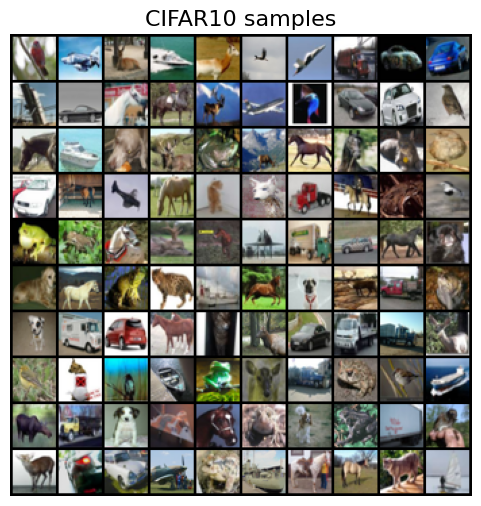

In [ ]:
train_data, test_data = load_dataset("cifar10", flatten=False, binarize=False)
visualize_images(train_data, "CIFAR10 samples")

Let implement function to take square root of matrix (we need it for the formula above).

In [ ]:
# this is a helper function, do not change
def get_matrix_sqrt(x: torch.Tensor) -> torch.Tensor:
    y = x.cpu().detach().numpy()
    y = scipy.linalg.sqrtm(y)
    if not np.isfinite(y).all():
        print("bad!")
    return torch.Tensor(y.real, device=x.device)

Not let implement the function to calculate the distance (it is just the formula above).

In [ ]:
def get_distance(
    mu_x: torch.Tensor, mu_y: torch.Tensor, sigma_x: torch.Tensor, sigma_y: torch.Tensor
) -> torch.Tensor:
    # ====
    # your code

    return (torch.norm(mu_x - mu_y) ** 2 + torch.trace(sigma_x + sigma_y - 2 * get_matrix_sqrt(sigma_x @ sigma_y)) )


def test_get_distance():
    mu_x = torch.ones(3)
    mu_y = torch.ones(3) * 10
    sigma_x = torch.eye(3) * 5
    sigma_y = torch.eye(3) * 3
    dist = get_distance(mu_x, mu_y, sigma_x, sigma_y)
    assert np.isclose(dist, 243.7621)


test_get_distance()

Let implement the function which calculate intermediate representations for real and fake samples.

In [ ]:
def get_features(
    generator: object,
    inception_model: object,
    loader: object,
    n_samples: int,
    batch_size: int,
) -> tuple:
    if USE_CUDA:
        generator = generator.cuda()
        inception_model.cuda()

    generator.eval()
    inception_model.eval()

    fake_features_list = []
    real_features_list = []
    cur_samples = 0

    with torch.no_grad():
        for real_samples in loader:
            if USE_CUDA:
                real_samples = real_samples.cuda()
            # ====
            # your code
            # get features of real samples
            # drop the w and h dimensions of the obtained features

            # ====

            real_features = inception_model(real_samples).mean((2, 3))

            real_features_list.append(real_features)

            fake_samples = generator.sample(len(real_samples), step=3)
            if USE_CUDA:
                fake_samples = fake_samples.cuda()
            # ====
            # your code
            # get features of fake samples
            # drop the w and h dimensions of the the obtained features

            # ====
            fake_features = inception_model(fake_samples).mean((2, 3))

            fake_features_list.append(fake_features)

            cur_samples += len(real_samples)
            if cur_samples >= n_samples:
                break

    fake_features_all = torch.cat(fake_features_list)
    real_features_all = torch.cat(real_features_list)
    return fake_features_all, real_features_all

In [ ]:
# this is a helper function, do not change
def calculate_stats(fake_features: torch.Tensor, real_features: torch.Tensor) -> tuple:
    def get_covariance(features):
        return torch.Tensor(np.cov(features.cpu().detach().numpy(), rowvar=False))

    mu_fake = fake_features.mean(0)
    mu_real = real_features.mean(0)
    sigma_fake = get_covariance(fake_features)
    sigma_real = get_covariance(real_features)
    return mu_fake, mu_real, sigma_fake, sigma_real

Now we are ready to implement the main function for getting FID.

In [ ]:
def get_frechet_inception_distance(
    generator: object,
    inception_model: object,
    loader: object,
    n_samples: int,
    batch_size: int,
) -> torch.Tensor:
    # ====
    # your code
    # 1) get features
    # 2) calculate stats
    # 3) get distance

    # ====

    fake_feat, real_feat = get_features(generator, inception_model, loader, n_samples, batch_size)
    mu_fake, mu_real, sigma_fake, sigma_real = calculate_stats(fake_feat, real_feat)
    return get_distance(mu_real, mu_fake, sigma_real, sigma_fake)

In [ ]:
N_SAMPLES = 10000  # number of samples in the cifar10 test dataset
BATCH_SIZE = 16  # samples per iteration

gt_loader = data.DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=False)

reset_seed()

FID_r1 = get_frechet_inception_distance(
    generator=stylegan_r1,
    inception_model=inception_model_act4,
    loader=gt_loader,
    n_samples=N_SAMPLES,
    batch_size=BATCH_SIZE,
)

reset_seed()

FID_wgangp = get_frechet_inception_distance(
    generator=stylegan_wgangp,
    inception_model=inception_model_act4,
    loader=gt_loader,
    n_samples=N_SAMPLES,
    batch_size=BATCH_SIZE,
)

In [ ]:
FID_r1

tensor(48.3515, device='cuda:0')

In [ ]:
assert np.allclose(FID_r1.cpu().numpy(), 48.35, atol=0.2)
assert np.allclose(FID_wgangp.cpu().numpy(), 48.4, atol=0.2)